In [1]:
# importing packages

# data manipulation
import numpy as np
import pandas as pd

# benchmarking
import time

# importing and saving analysis data
import os.path

# letting me know when large calculattions are done
import winsound

# plotting and image exporting
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib notebook
# %matplotlib inline

# my custom functions for this project
# see file for specifics
import project_functions as pf

In [2]:
# importing star data from VizieR
data = pd.read_csv('data_big.csv')
data = data[data["Hpmag"]<6]
n_stars = len(data)
print(n_stars)

# getting star positions from the data
star_ra = data["Radeg"] * np.pi / 180
star_dec = data["Dedeg"] * np.pi / 180
# converting right ascention and declination to cartesian coordinates on unit celestial sphere
# conversion from https://en.wikipedia.org/wiki/Equatorial_coordinate_system
star_x = np.cos(star_dec) * np.cos(star_ra)
star_y = np.cos(star_dec) * np.sin(star_ra)
star_z = np.sin(star_dec)
pos = pd.concat([star_x, star_y, star_z], axis=1)
pos = pos.rename(columns = {0:"x", 1:"y", "Dedeg":"z"})

# star brightnesses from data
star_mag = data["Hpmag"]
dark = 0.9 * pf.normalize(star_mag)
# a normalized array setting the smallest brightnesses to be 1/10 of the largests brightnesses in feature space
bright = np.array(1 - 0.9 * dark)

# importing centers and areas of the modern constellations
# data from https://en.wikipedia.org/wiki/88_modern_constellations_by_area
truth = pd.read_csv("constellation_centers.csv")
true_centers = np.zeros((88, 3))
for i in range(88):
    ra0 = truth["RA"].iloc[i]
    dec0 = truth["Dec"].iloc[i]
    true_centers[i, :] = pf.ra_dec_2_cart(ra0, dec0)
percent_const = truth["SA"] / 41253  # percent of sky that each constellation takes up
percent_const /= np.sum(percent_const)  # make sure it normalizes to one

4559


In [3]:
# k-center progression animation

# whether or not to animate (prevents accidents)
animate = False

if animate:
    
    # set how far away the cluster center marks are from the unit sphere
    bump = 1.1

    # set size of points
    size = 400

    # initialize figure
    fig, ax = pf.init_3D_figure()
    plt.show()

    # the amount of clusters to make
    amount = 30
    
    # for the amount of clusters
    for i in range(amount):
        
        # clear plot and turn off axes
        ax.clear()
        ax.set_axis_off()  #  could maybe take out of loop
        
        # reset title (could maybe take out of loop)
        ax.set_title('K-center clustering with %d constellations'%n_const, fontsize=40)
        
        # plot stars colored by their cluster ID
        ax.scatter(star_x, star_y, star_z, marker='o', c=pf.normalize(cluster_total[i, :]), cmap="tab20", s=size*5e2/n_stars, alpha=.8, zorder=0)
        
        # plot cluster centers
        ax.scatter(bump * centers_final[:(i-0), 0], bump * centers_final[:(i-0), 1], bump * centers_final[:(i-0), 2], marker='X', c="k", s=size, zorder=10)
        
        # redraw the plot
        plt.draw()
        
        # rotate the plot
        ax.view_init(30, 4*i)
        
        # set a pause so nothing weird happens
        plt.pause(.001)
        
        # show and save the plot frame
        fig = plt.gcf()
        fig.savefig("gifs/kcenter/test_%d.png"%i, bbox_inches="tight")

    # open all of the images
    images=[]
    for i in range(amount):
        images.append(Image.open("gifs/kcenter/test_%d.png"%i))

    # combine the images into a gif
    images[0].save('gifs/kcenter/test.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=400,
                   loop=0)

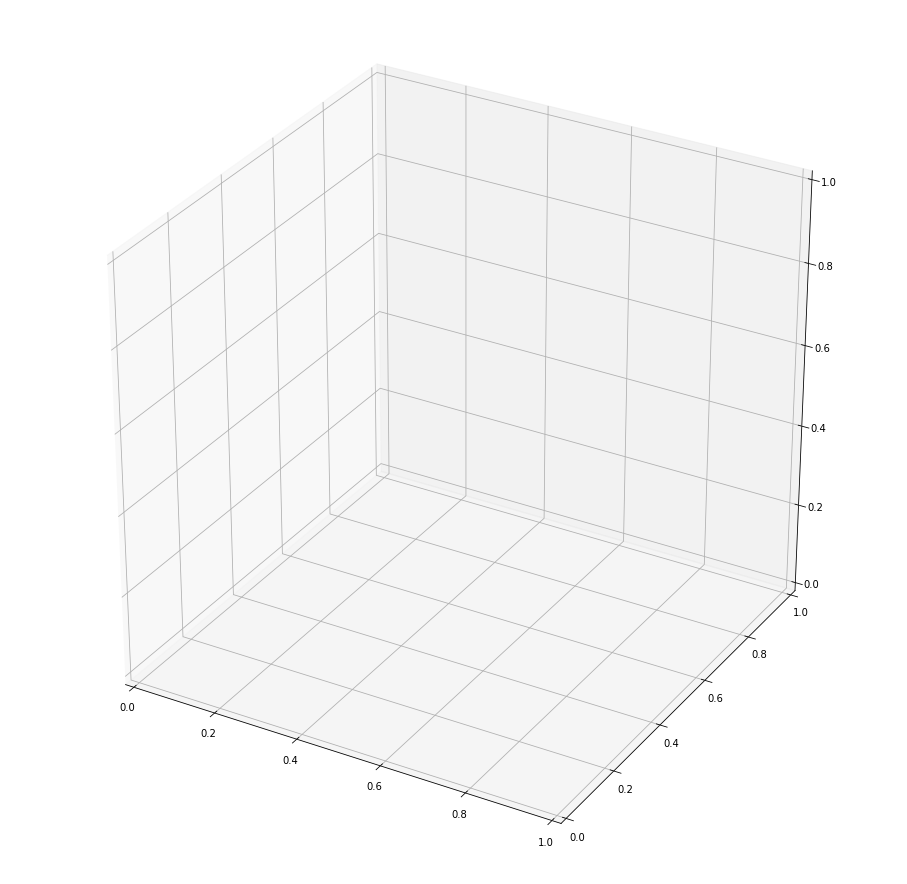

NameError: name 'cluster_total' is not defined

In [4]:
# k-means progression animation

# whether or not to animate (prevents accidents)
animate = False

# set how far away the cluster center marks are from the unit sphere
bump = 1.1

# set size of points
size = 400

# initialize figure
fig, ax = pf.init_3D_figure()
plt.show()

# amount of iterations the kmeans went through
amount = np.shape(cluster_total)[0] - 1

if animate:
    for i in range(amount):
        
        # clear plot and turn off axes
        ax.clear()
        ax.set_axis_off()  #  could maybe take out of loop
        
        # reset title (could maybe take out of loop)
        ax.set_title('Online k-means clustering with %d constellations'%n_const, fontsize=40)

        # plot stars colored by their cluster ID
        ax.scatter(star_x, star_y, star_z, marker='o', c=pf.normalize(cluster_total[i + 1, :]), cmap="tab20", s=size*5e2/n_stars, alpha=.8, zorder=0)
        
        # plot cluster centers
        ax.scatter(bump * centers_total[i, :, 0], bump * centers_total[i, :, 1], bump * centers_total[i, :, 2], marker='X', c="k", s=size, zorder=10)
        
        # redraw the plot
        plt.draw()
        
        # set a pause so nothing weird happens
        plt.pause(.001)
        
        # show and save the plot frame
        fig = plt.gcf()
        fig.savefig("gifs/kmeans/kmeans_%d.png"%i, bbox_inches="tight")

    # open all of the images
    images=[]
    for i in range(amount):
        images.append(Image.open("gifs/kmeans/okmeans_%d.png"%i))

    # combine the images into a gif
    images[0].save('gifs/kmeans/anitest2.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=500,
                   loop=0)

In [5]:
# rotation of final clustering animation

# whether or not to animate (prevents accidents)
animate = False

if animate:
    
    # set how far away the cluster center marks are from the unit sphere
    bump = 1.1

    # set size of points
    size = 400

    # initialize figure
    fig, ax = pf.init_3D_figure()
    plt.show()

    # plot stars colored by their cluster ID
    ax.scatter(star_x, star_y, star_z, marker='o', c=pf.normalize(cluster_final), cmap="tab20", s=size*5e2/n_stars, alpha=.8, zorder=0)

    # plot cluster centers
    ax.scatter(bump * centers_final[:, 0], bump * centers_final[:, 1], bump * centers_final[:, 2], marker='X', c="k", s=size, zorder=10)

    # plot normal constellation centers
    # ax.scatter(bump * true_centers[:, 0], bump * true_centers[:, 1], bump * true_centers[:, 2], marker='X', c="r", s=size, zorder=2)

    ax.set_title('K-center clustering with %d constellations'%n_const, , fontsize=40)

    # turn off axes and show plot
    ax.set_axis_off()
    plt.show()

    # set how fast the plot rotates
    ani_coarseness=3
    
    # for each angle
    for angle in range(0, int(360/ani_coarseness)):
        
        # rotate and redraw plot
        ax.view_init(30, ani_coarseness*angle)
        plt.draw()
        
        # set a pause so nothing weird happens
        plt.pause(.001)
        
        # show and save the plot frame
        fig = plt.gcf()
        fig.savefig("gifs/test/test_%d.png"%angle, bbox_inches="tight")

    # open all of the images
    images=[]
    for angle in range(0, int(360/ani_coarseness)):
        images.append(Image.open("gifs/test/test_%d.png"%angle))
    
    # combine the images into a gif
    images[0].save('gifs/test/anitest.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=50,
                   loop=0)

SyntaxError: invalid syntax (<ipython-input-5-46ece80207c9>, line 27)

In [6]:
# Spherical KDE animation

# whether or not to animate (prevents accidents)
animate = False

# how detailed the sphere should be
fine = 100

# evenly spaced RA and dec to build a mesh grid for surface plot
dec = np.linspace(-np.pi / 2, np.pi / 2, fine)
ra = np.linspace(0, 2 * np.pi, fine)
dec, ra = np.meshgrid(dec, ra)

# get values of the contructed probability density function at each point
fcolors = np.zeros((fine, fine))
test = pf.ra_dec_2_cart(ra, dec)
for i in range(fine):
    for j in range(fine):
        fcolors[i, j] = pf.sgauss_tot(test[:, i, j], true_centers, lams=100., a=percent_const)
# save = np.copy(fcolors)
fcolors = pf.normalize(fcolors)

# initialize plot
fig, ax = init_3D_figure()

# plot surface
ax.plot_surface(test[0, :, :], test[1, :, :], test[2, :, :],  rstride=1, cstride=1, facecolors=cm.viridis(fcolors))

#turn off axes and show plot
ax.set_axis_off()
plt.show()

if animate:
    
    # set how fast the plot rotates
    ani_coarseness=3
    
    # for each angle
    for angle in range(0, int(360/ani_coarseness)):

        # rotate and redraw plot
        ax.view_init(30, ani_coarseness*angle)
        plt.draw()
        
        # set a pause so nothing weird happens
        plt.pause(.001)
        
        # show and save the plot frame
        fig = plt.gcf()
        fig.savefig("gifs/heur/heur_%d.png"%angle, bbox_inches="tight")

    # open all of the images
    images=[]
    for angle in range(0, int(360/ani_coarseness)):
        images.append(Image.open("gifs/heur/heur_%d.png"%angle))

    # combine the images into a gif
    images[0].save('gifs/heur/anitest.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=50,
                   loop=0)

NameError: name 'sgauss_tot' is not defined

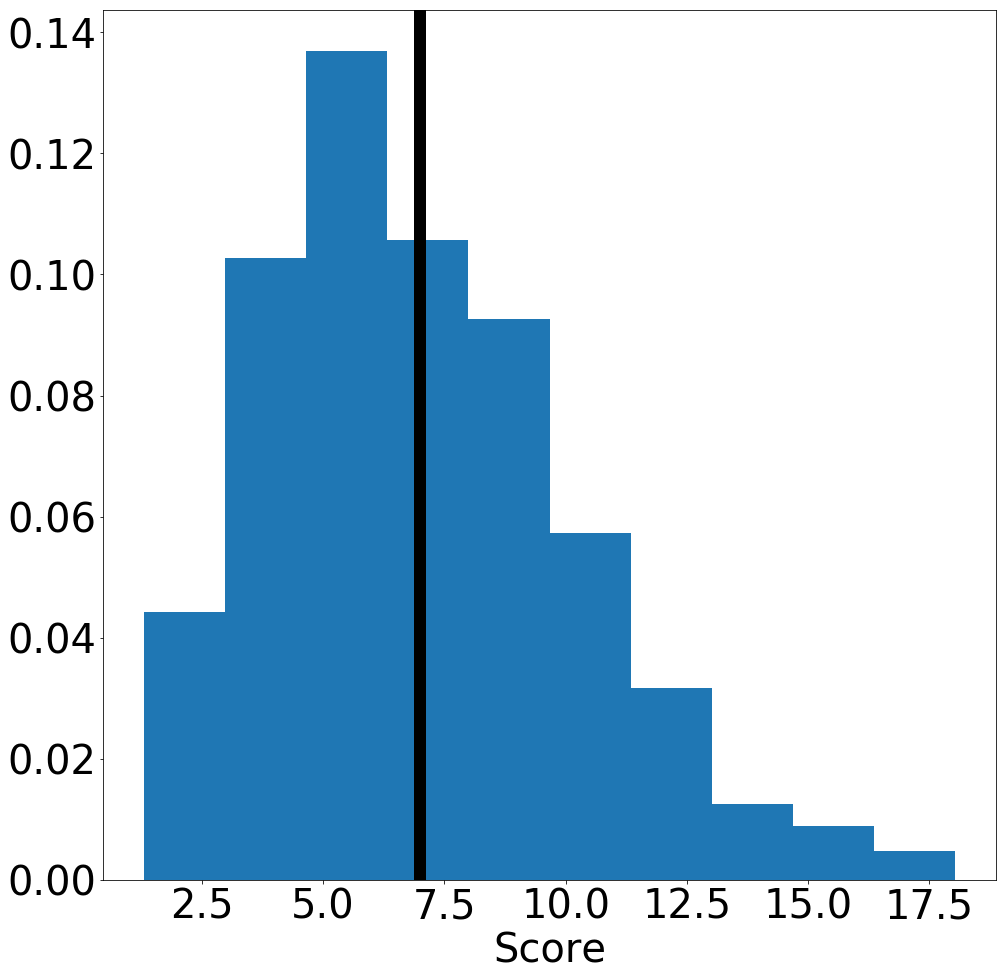

In [21]:
# random draw score bootstrap and histogram
plot_size = 1

# get the scores from random center draws
rand_tots = pf.bootstrap_array(resample = 0, filename = "random_1000.npy")

ax = pf.init_plot(plot_size=plot_size)
plt.hist(rand_tots, density=True)
ax.set_xlabel('Score')

# place a line where we expect the mean to be
plt.axvline(x=88/(4 * np.pi), c='k', linewidth=12 * plot_size)

# create plot
# pf.finish_plot()
pf.finish_plot(fig_name="random_heur_1000.png")

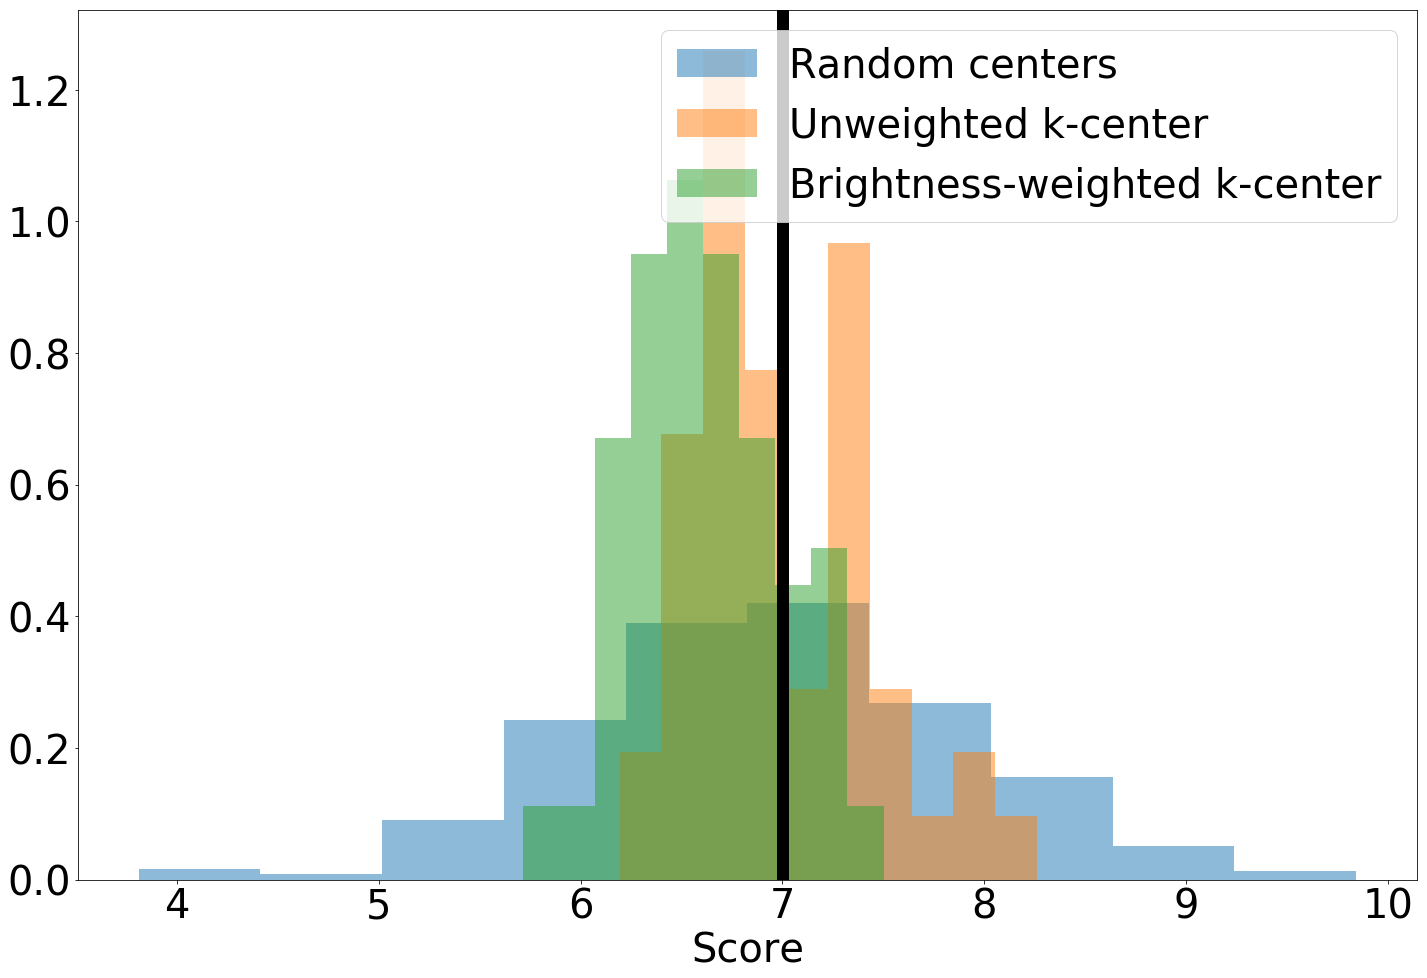

In [28]:
# k-center score bootstrap and histogram
plot_size = 1

# get the scores from random center draws, and kcenter with and without brightness weighting
kc_nw_tots = pf.bootstrap_array(resample = 0, filename = "kc_nw_1000.npy", updates = True, cluster_func='kcenter')
kc_w_tots = pf.bootstrap_array(resample = 0, filename = "kc_w_1000.npy", updates = True, cluster_func='kcenter', use_weights=True)
rand_tots = pf.bootstrap_array(resample = 0, filename = "random_1000.npy")

ax = pf.init_plot(plot_size=plot_size, wide=1.5)
plt.hist(rand_tots, density=True, label='Random centers', alpha=0.5)
plt.hist(kc_nw_tots, density=True, label='Unweighted k-center', alpha=0.5)
plt.hist(kc_w_tots, density=True, label='Brightness-weighted k-center', alpha=0.5)
legend = ax.legend(fontsize=plot_size * 40)
ax.set_xlabel('Score')

# place a line where we expect the mean to be
plt.axvline(x=88/(4 * np.pi), c='k', linewidth=12 * plot_size)

# pf.finish_plot()
pf.finish_plot(fig_name="kc_compare_heur_1000.png")

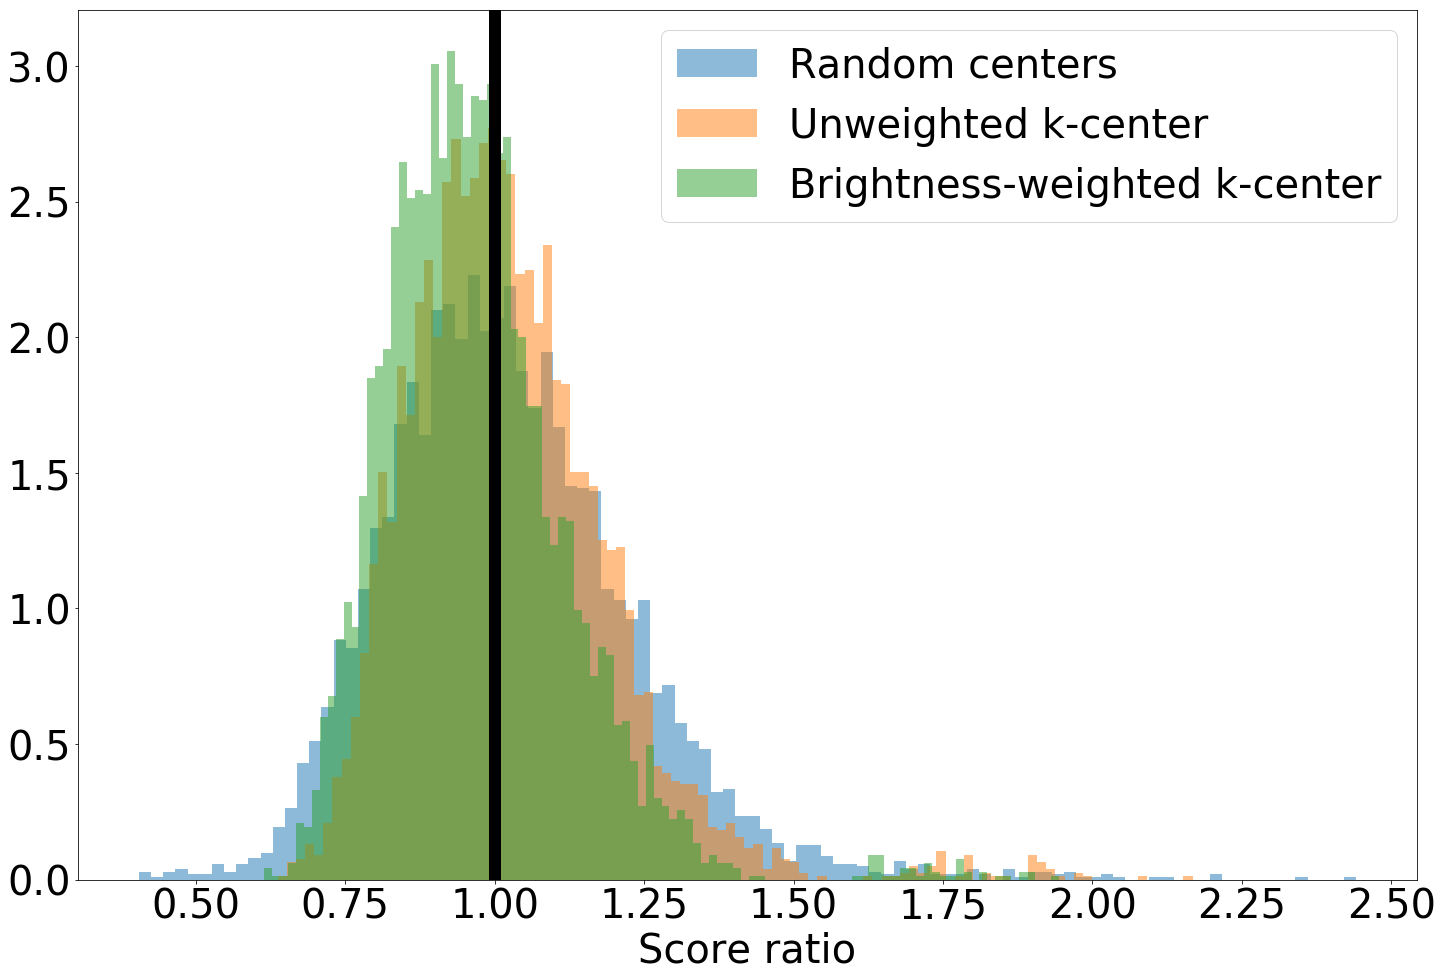

In [29]:
# comparison of random center scores to kcenter scores
draws = 5000
plot_size = 1

# average amount of draws per bin
per_bin = 50
n_bins = int(draws/per_bin)

# get ratios between kcenter scores and random center scores
comp_rc = np.divide(np.random.choice(rand_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))
comp_nw = np.divide(np.random.choice(kc_nw_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))
comp_w = np.divide(np.random.choice(kc_w_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))

ax = pf.init_plot(plot_size=plot_size, wide=1.5)
plt.hist(comp_rc, density=True, label='Random centers', alpha=0.5, bins=n_bins)
plt.hist(comp_nw, density=True, label='Unweighted k-center', alpha=0.5, bins=n_bins)
plt.hist(comp_w, density=True, label='Brightness-weighted k-center', alpha=0.5, bins=n_bins)
legend = ax.legend(fontsize=plot_size * 40)
ax.set_xlabel('Score ratio')

# place a line where we expect the mean to be
plt.axvline(x=1, c='k', linewidth=12 * plot_size)

# pf.finish_plot()
pf.finish_plot(fig_name="kc_ratio_heur_1000.png")

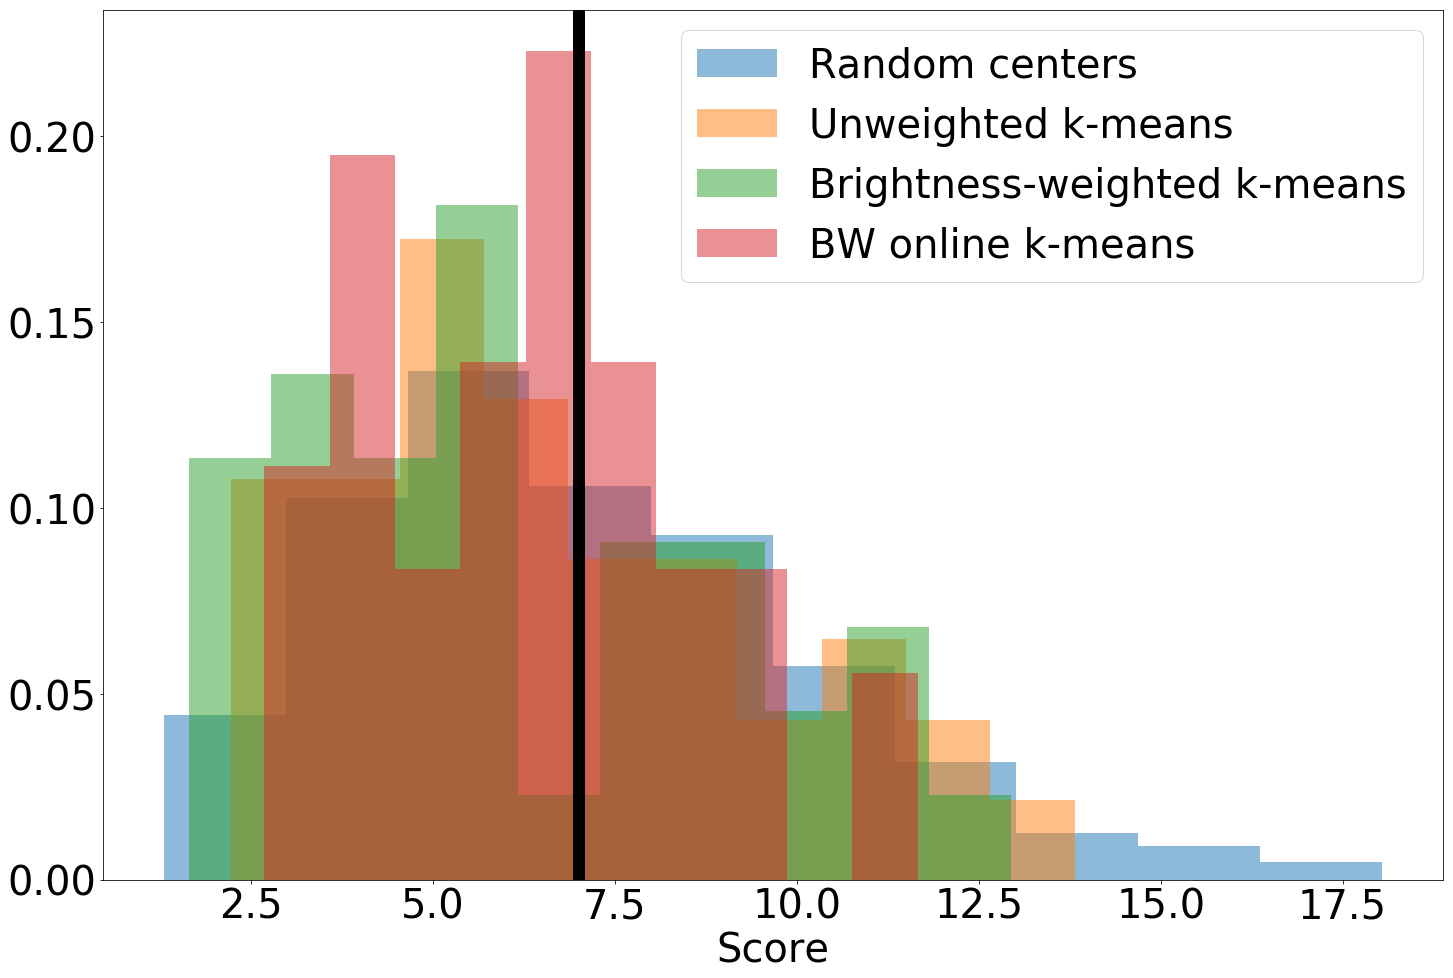

In [34]:
# k-means score bootstrap and histogram
plot_size = 1

# get the scores from random center draws, and kmeans with and without brightness weighting and online learning
km_nw_no_tots = pf.bootstrap_array(resample = 0, filename = "km_nw_no_1000.npy", updates = True, cluster_func='kmeans')
km_w_no_tots = pf.bootstrap_array(resample = 0, filename = "km_w_no_1000.npy", updates = True, cluster_func='kmeans', use_weights=True)
km_w_oa_tots = pf.bootstrap_array(resample = 0, filename = "km_w_oa_1000.npy", updates = True, cluster_func='kmeans', use_weights=True, online="anneal")
rand_tots = pf.bootstrap_array(resample = 0, filename = "random_1000.npy")

ax = pf.init_plot(plot_size=plot_size, wide=1.5)
plt.hist(rand_tots, density=True, label='Random centers', alpha=0.5)
plt.hist(km_nw_no_tots, density=True, label='Unweighted k-means', alpha=0.5)
plt.hist(km_w_no_tots, density=True, label='Brightness-weighted k-means', alpha=0.5)
plt.hist(km_w_oa_tots, density=True, label='BW online k-means', alpha=0.5)
legend = ax.legend(fontsize=plot_size * 40)
ax.set_xlabel('Score')

# place a line where we expect the mean to be
plt.axvline(x=88/(4 * np.pi), c='k', linewidth=12 * plot_size)

# pf.finish_plot()
pf.finish_plot(fig_name="km_compare_heur_1000.png")

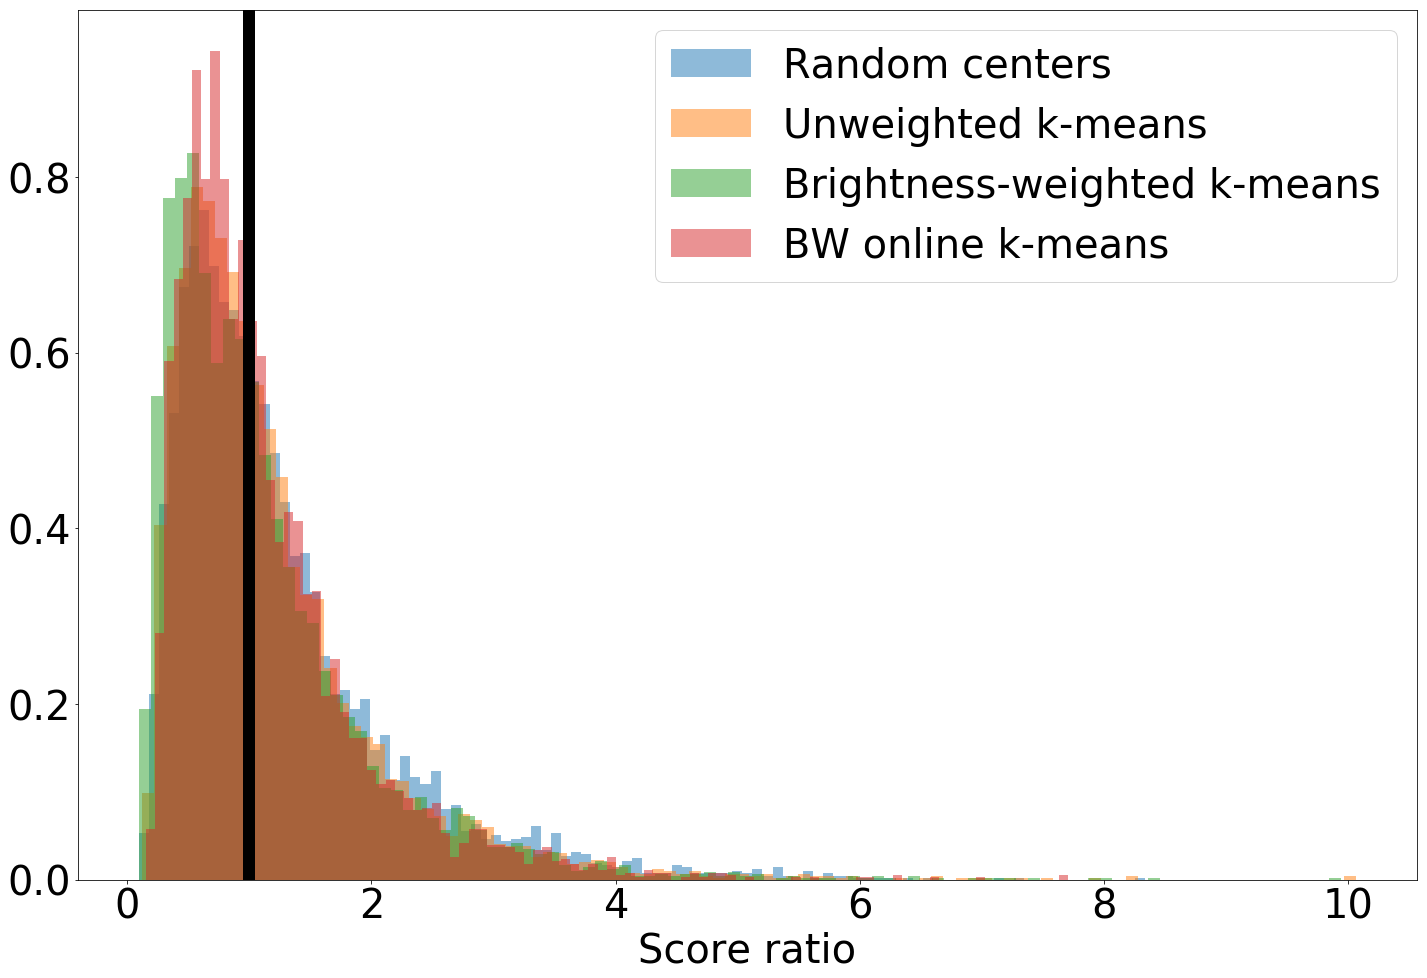

In [35]:
# comparison of random center scores to kmeans scores
draws = 5000
plot_size = 1

# average amount of draws per bin
per_bin = 50
n_bins = int(draws/per_bin)

# get ratios between kmeans scores and random center scores
comp_rc = np.divide(np.random.choice(rand_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))
comp_nw = np.divide(np.random.choice(km_nw_no_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))
comp_w = np.divide(np.random.choice(km_w_no_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))
comp_o = np.divide(np.random.choice(km_w_oa_tots, size=draws, replace=True), np.random.choice(rand_tots, size=draws, replace=True))

ax = pf.init_plot(plot_size=plot_size, wide=1.5)
plt.hist(comp_rc, density=True, label='Random centers', alpha=0.5, bins=n_bins)
plt.hist(comp_nw, density=True, label='Unweighted k-means', alpha=0.5, bins=n_bins)
plt.hist(comp_w, density=True, label='Brightness-weighted k-means', alpha=0.5, bins=n_bins)
plt.hist(comp_o, density=True, label='BW online k-means', alpha=0.5, bins=n_bins)
legend = ax.legend(fontsize=plot_size * 40)
ax.set_xlabel('Score ratio')

# place a line where we expect the mean to be
plt.axvline(x=1, c='k', linewidth=12 * plot_size)

# pf.finish_plot()
pf.finish_plot(fig_name="km_ratio_heur_1000.png")

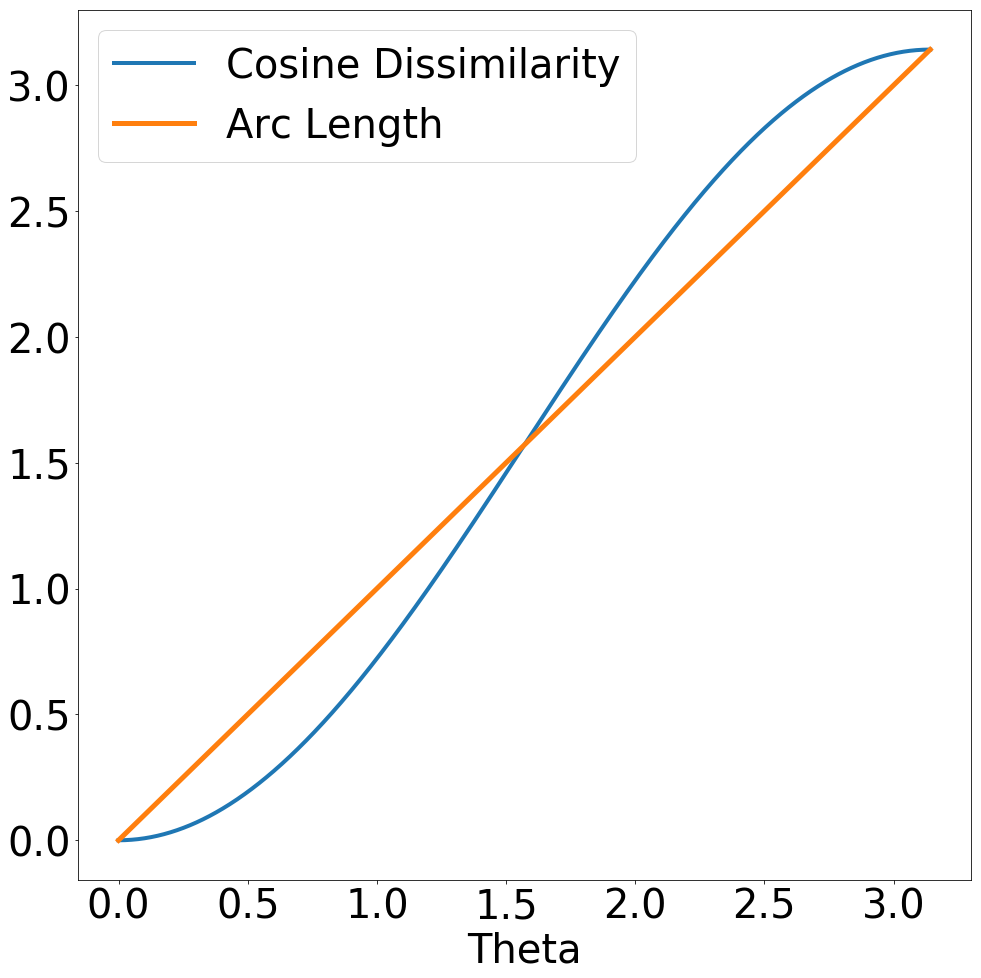

In [17]:
# plotting difference between cosine dissimiliaty and 

# cosine dissimilarity
def cosine_dissimilarity(th):
    return 1-np.cos(th)


x = np.linspace(0, np.pi, 1000)
ax = pf.init_plot()
line1 = plt.plot(x, np.pi * cosine_dissimilarity(x) / 2, label='Cosine Dissimilarity', linewidth=4)
line2 = plt.plot(x, x, label = 'Arc Length', linewidth=5)
legend = ax.legend(fontsize=40)
ax.set_xlabel('Theta')

# pf.finish_plot()
pf.finish_plot(fig_name="distance_comp.png")